<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Доказательство-гипотезы" data-toc-modified-id="Доказательство-гипотезы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Доказательство гипотезы</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Исходная-матрица" data-toc-modified-id="Исходная-матрица-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исходная матрица</a></span></li><li><span><a href="#Перобразованная-матрица" data-toc-modified-id="Перобразованная-матрица-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Перобразованная матрица</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.datasets import make_spd_matrix

In [17]:
data = pd.read_csv('/datasets/insurance.csv')

In [18]:
display(data.head(15))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [19]:
# приведем название признаков к нижнему регистру и анлийскому написанию
data.rename(columns={
    'Пол': 'sex', 
    'Возраст': 'age',
    'Зарплата': 'salary',
    'Члены семьи': 'family_members', 
    'Страховые выплаты': 'insurance_payment'}, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                5000 non-null   int64  
 1   age                5000 non-null   float64
 2   salary             5000 non-null   float64
 3   family_members     5000 non-null   int64  
 4   insurance_payment  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [21]:
data.describe()

,sex,age,salary,family_members,insurance_payment
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [22]:
# просмотр дубликатов
data.duplicated().value_counts()

False    4847
True      153
dtype: int64

В дата сете присутсвуют дубликаты. В рамках данного задания удалять их не будем

In [23]:
data.corr()

,sex,age,salary,family_members,insurance_payment
sex,1.000000,0.002074,0.014910,-0.008991,0.010140
age,0.002074,1.000000,-0.019093,-0.006692,0.651030
salary,0.014910,-0.019093,1.000000,-0.030296,-0.014963
family_members,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
insurance_payment,0.010140,0.651030,-0.014963,-0.036290,1.000000


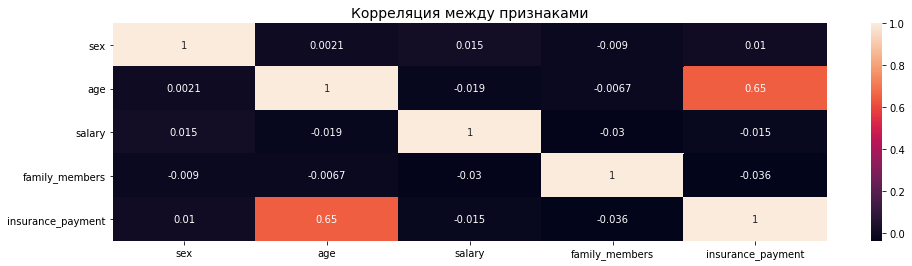

In [31]:
# построим 
plt.figure(figsize = (16,4))
plt.title('Корреляция между признаками', size=14)
sns.heatmap(data.corr(), annot = True);

Присуствует коррелция между 'age' и 'insurance_payment'. Коэффициент корреляции = 0.65.

Промежуточный вывод: 
- Загружены и проанализированны данные;
- Размер выборки 5000 строк;
- 5 признаков 'Пол', 'Возраст', 'Зарплата', 'Члены семьи' и 'Страховые выплаты' были переименованы в 'sex', 'age', 'salary', 'family_members' и 'insurance_payment' соответсвенно.
- Пропуски отсуствуют;
- Лишние признаки отсуствуют;
- Присутствует небольшое количество дубликатов, удалять не стали;
- Корреляция между признаком 'age' и целевым признаком 'insurance_payment', коэффициент корреляции = 0.65.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Доказательство гипотезы

**Ответ:** При умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:**

Пусть матрица P-обратимая матрица.

Тогда Формула обучения:

$$
w' = ((X P)^T X P)^{-1} (XP)^T y
$$

При преобразовании учтем:
$$
(X P)^T = P^T X^T 
$$

$$
(X P)^{-1} = P^{-1}X^{-1}
$$

$$
(P^T)^{-1} P^T = E = 1
$$



Раскроем скобки согласно указанным выше правилам:

$$
w' = (X P)^T X P)^{-1} (XP)^T y = (P^T X^T  X P)^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$


Подставим полученный результат в формулу для пресказания:

$$
a' = X' w' = X P P^{-1} w = X w = a
$$


Векторы предсказаний совпали.

## Алгоритм преобразования

**Алгоритм**
Преобзоавание матрицы признаков путем умножения на случайную обратимую квадратную матрицу. Данная матрица будет ключом для шифрования данных.

Порядок действия:
1. Создадим случайную квадратную матрицу  P, размерности равной количеству признаков;
2. Проверим матрицу на обратимость и создадим обратную матрицу;
3. Умножаем матрицу признаков  X на полученную матрицу P;
4. Обучение линейной регрессии на исходных и на зашифрованных данных;
5. Сравнение получившихся метрик R2.

**Обоснование**
- Данный алгоритм направлен на шифрование данных, который повзолит защитить (скрыть истинную) персональную информацию.
- Выше мы доказали, умножение на обратимую матрицу не должно повлиять на качество модели.

## Проверка алгоритма

В качестве проверки гипотезы возьмем метрику  R2.
1. Расчитаем метрику R2 на исходных данных.
2. Расичтаем метрику R2 на преобразованных данных.

Если доказательство выше верно, то полученные метрики должны совпасть.

Целевой признак: 'Страховые выплаты'

In [7]:
#выделим признаки
features = data.drop('insurance_payment', axis=1)
#выделим целевой признак
target = data['insurance_payment']

### Исходная матрица

In [8]:
# вызделим выборки на обучающую и тренировочную
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [9]:
# check
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3750, 4)
(1250, 4)
(3750,)
(1250,)


Расчиатем r2 на исходной матрице

In [10]:
# создадим модель линейной регресисии
model = LinearRegression()
# обучим модель
model.fit(features_train, target_train)
# получим предсказание 
predictions = model.predict(features_test)
# посчитаем метрику R2
r2 = r2_score(target_test, predictions)
# вывод метрики R2
print('Метрика R2 на исходных данных:', r2)

Метрика R2 на исходных данных: 0.43522757127026546


### Перобразованная матрица

Согласно алгоритму создаим случайную и проверим ее на обратимость

In [11]:
# создание матрицы
matrix = make_spd_matrix(n_dim=4, random_state=123)
print('Случайная матрица:')
print(matrix)
print()

# обратная матрицы
matrix_inv = np.linalg.inv(matrix)
print('Обратная матрица:')
print(matrix_inv)

Случайная матрица:
[[ 0.47243659  0.36201499  0.23624413 -0.20756552]
 [ 0.36201499  3.26723888  1.70966795 -0.39838002]
 [ 0.23624413  1.70966795  1.32704651 -0.17893753]
 [-0.20756552 -0.39838002 -0.17893753  0.35460046]]

Обратная матрица:
[[ 2.97675307  0.09601407 -0.43363796  1.63149048]
 [ 0.09601407  1.02415391 -1.2595126   0.57122764]
 [-0.43363796 -1.2595126   2.39108163 -0.46226306]
 [ 1.63149048  0.57122764 -0.46226306  4.18355526]]


In [12]:
#check
print(matrix @ matrix_inv)

[[ 1.00000000e+00 -9.04649461e-18  5.77228564e-17  4.97307715e-17]
 [-1.59084447e-16  1.00000000e+00  4.47228204e-16  5.05269948e-16]
 [-1.31106228e-16 -1.26800721e-16  1.00000000e+00  1.90124295e-16]
 [ 5.39771175e-17  5.12284035e-17 -5.17335637e-17  1.00000000e+00]]


Ошибок нет. Можно переходить к преобразованию матрицы признаков.

In [13]:
# преобразуем признаки
features_t = features.values @ matrix

In [14]:
#check
print(features.shape)
print(features_t.shape)

(5000, 4)
(5000, 4)


In [15]:
#check
display(features.head(5))
print(features_t)

,sex,age,salary,family_members
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


[[11732.81637505 84933.45064883 65891.66076973 -8891.48812605]
 [ 8993.72209566 65117.27663171 50506.23330695 -6817.59709104]
 [ 4971.62518218 35997.77683511 27917.55715724 -3769.24118958]
 ...
 [ 8015.50120409 58022.29145405 45020.71229678 -6073.24072949]
 [ 7732.99714812 55977.18802921 43431.73312289 -5859.16541635]
 [ 9601.91300269 69503.96501156 53926.01646352 -7275.87139908]]


 Преобразование данных произошло успешно.

In [16]:
# разделим выборки на обучающую и тренировочную
features_train_t, features_test_t, target_train_t, target_test_t = train_test_split(
    features_t, target, test_size=0.25, random_state=12345)

In [17]:
# check
print(features_train_t.shape)
print(features_test_t.shape)
print(target_train_t.shape)
print(target_test_t.shape)

(3750, 4)
(1250, 4)
(3750,)
(1250,)


In [18]:
# создадим модель линейной регресисии
model_t = LinearRegression()
# обучим модель
model_t.fit(features_train_t, target_train_t)
# получим предсказание 
predictions_t = model_t.predict(features_test_t)
# посчитаем метрику R2
r2_t = r2_score(target_test_t, predictions_t)
# вывод метрики R2
print('Метрика R2 на преобразованных данных:', r2_t)

Метрика R2 на преобразованных данных: 0.43522757127026823


In [19]:
#check
print(r2)
print(r2_t)

0.43522757127026546
0.43522757127026823


Промежуточные выводы: Метрики r2 на исходных данных и на перобразованных данных совпадают.

## Выводы

1. Данные загружены и обработаны;
2. Получен ответ на вопрос об умножении матриц;
    - математически доказано утверждение: при умножении матрицы признаков на обратимую матрицу качество линейной регрессии не изменится; 
3. Предложен алгоритм преобразования данных путем умножения матрицы данных на квадратную обратимую матрицу;
4. Алгоритм проверен:
    - проведено сравнение качества моделей до и после преобразования,
    - значение метрики r2 для обоих моделей составил 0,435.